# Practice Session PS05: Recommendation engines (Content-based)

Author: <font color="blue">Aniol Petit Cabarrocas</font>

E-mail: <font color="blue">aniol.petit01@estudiant.upf.edu</font>

Date: <font color="blue">30/10/2024</font>

In [2]:
import pandas as pd   
import numpy as np  
import re
import matplotlib.pyplot as plt  
from math import*
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1. Load and join the dataset

In [3]:
# Leave this code as-is

FILENAME_MOVIES = "movies-2000s.csv"
FILENAME_RATINGS = "ratings-2000s.csv"
FILENAME_TAGS = "tags-2000s.csv"

In [4]:
# Leave this code as-is

movies = pd.read_csv(FILENAME_MOVIES, 
                    sep=',', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
display(movies.head(5))

ratings_raw = pd.read_csv(FILENAME_RATINGS, 
                    sep=',', 
                    encoding='latin-1',
                    engine='python',
                    names=['user_id', 'movie_id', 'rating'])
display(ratings_raw.head(5))

,movie_id,title,genres
0,2769,"Yards, The (2000)",Crime|Drama
1,3177,Next Friday (2000),Comedy
2,3190,Supernova (2000),Adventure|Sci-Fi|Thriller
3,3225,Down to You (2000),Comedy|Romance
4,3228,Wirey Spindell (2000),Comedy


,user_id,movie_id,rating
0,4,1,3.0
1,4,260,3.5
2,4,296,4.0
3,4,541,4.5
4,4,589,4.0


<font size="+1" color="red">Replace this cell with your own code to add a `year` column to the `movies` dataframe.</font>

In [5]:
def yearof(movie):
    year = movie.strip()[-5:-1] #take last 4 characters without counting the closing paranthesis
    return int(year)

In [6]:
movies["year"] = movies.apply(lambda x: yearof(x["title"]), axis=1)
display(movies.head(5))

,movie_id,title,genres,year
0,2769,"Yards, The (2000)",Crime|Drama,2000
1,3177,Next Friday (2000),Comedy,2000
2,3190,Supernova (2000),Adventure|Sci-Fi|Thriller,2000
3,3225,Down to You (2000),Comedy|Romance,2000
4,3228,Wirey Spindell (2000),Comedy,2000


<font size="+1" color="red">Replace this cell with a brief commentary indicating on which field you can join ratings_raw and movies.</font>

##### We should join movies and ratings_raw on some common column. In this case, they only share the movie_id column, so this is the one we'll be joining them with.

<font size="+1" color="red">Replace this cell with your own code to join the datasets into a single dataframe named "ratings". Your dataframe should have the following columns: user_id, movie_id, rating, title, genders, year</font>

In [8]:
ratings = pd.merge(movies, ratings_raw, how='inner', on='movie_id')
display(ratings.head(5))

,movie_id,title,genres,year,user_id,rating
0,2769,"Yards, The (2000)",Crime|Drama,2000,1115,4.0
1,2769,"Yards, The (2000)",Crime|Drama,2000,1209,2.0
2,2769,"Yards, The (2000)",Crime|Drama,2000,2004,3.0
3,2769,"Yards, The (2000)",Crime|Drama,2000,2502,4.0
4,2769,"Yards, The (2000)",Crime|Drama,2000,2827,4.0


<font size="+1" color="red">Replace this cell with your code for find _movies</font>

In [9]:
def find_movies(keyword, df):
    for _, row in df.iterrows():
        title = row["title"]
        if keyword in title:
            print(f"movie_id: {row["movie_id"]}, title: {title}")

find_movies("Barcelona", movies)

movie_id: 60950, title: Vicky Cristina Barcelona (2008)
movie_id: 182911, title: Barcelona Christmas Night (2015)


# 2. Exploratory Data Analysis

## 2.1. "Rating" variable

In [10]:
# LEAVE AS-IS

ratings['rating'].describe()

count    472971.000000
mean          3.462222
std           1.076063
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<font size="+1" color="red">Replace this cell with your code to plot a histogram of ratings. Include in the x axis the rating (1, 2, 3, 4, or 5) and in the y axis the probability of having that rating. Remember to label both axes.</font>

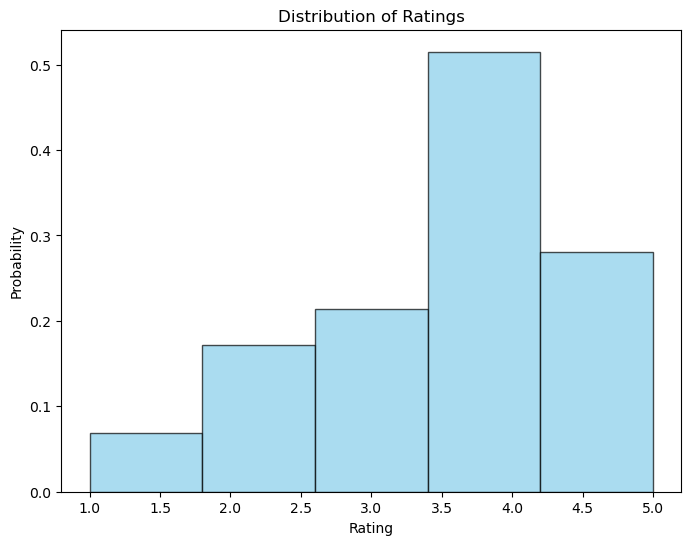

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(ratings['rating'], bins=5, range=(1, 5), density=True, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel("Rating")
plt.ylabel("Probability")
plt.title("Distribution of Ratings")

plt.show()

<font size="+1" color="red">Replace this cell with your code to plot a boxplot of ratings. Look for outlier values. </font>

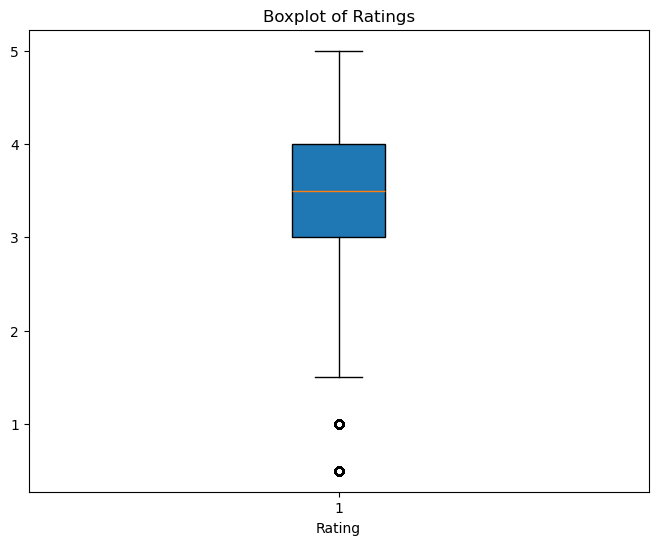

In [12]:
plt.figure(figsize=(8, 6))
plt.boxplot(ratings['rating'], vert=True, patch_artist=True)
plt.xlabel("Rating")
plt.title("Boxplot of Ratings")
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe in the distribution of ratings.</font>

##### In the box plot, we clearly see that the outliers are found for very low rating values, meaning that there are very few movies with a poor rating. From the histogram we can confirm that fact, and furthermore we can see that the majority of the ratings are around 4, great movies but not excelent ones. The rest of the values are similarly distributed, but with a higher amount of good movies than bad ones.

<font size="+1" color="red">Replace this cell with code to print the 10 movies with the most "good" ratings (i.e., ratings that are larger than 4.5), and the 10 movies with the most "bad" ratings (i.e., ratings than are smaller than 1.5)</font>

In [13]:
good_ratings = ratings[ratings['rating'] > 4.0]
bad_ratings = ratings[ratings['rating'] < 2.0]

top_good_movies = good_ratings["movie_id"].value_counts().nlargest(10)
print("Top 10 Movies with Many Good Ratings:")

for movie_id, count in top_good_movies.items():
    title = movies.loc[movies['movie_id'] == movie_id, 'title'].values[0]  
    print(f"movie_id: {movie_id}, title: {title}, good_ratings_count: {count}")
print("\n")
top_bad_movies = bad_ratings["movie_id"].value_counts().nlargest(10)
print("Top 10 Movies with Many Bad Ratings:")

for movie_id, count in top_bad_movies.items():
    title = movies.loc[movies['movie_id'] == movie_id, 'title'].values[0] 
    print(f"movie_id: {movie_id}, title: {title}, bad_ratings_count: {count}")

Top 10 Movies with Many Good Ratings:
movie_id: 4993, title: Lord of the Rings: The Fellowship of the Ring, The (2001), good_ratings_count: 3017
movie_id: 7153, title: Lord of the Rings: The Return of the King, The (2003), good_ratings_count: 2792
movie_id: 5952, title: Lord of the Rings: The Two Towers, The (2002), good_ratings_count: 2690
movie_id: 4226, title: Memento (2000), good_ratings_count: 2184
movie_id: 3578, title: Gladiator (2000), good_ratings_count: 1835
movie_id: 4973, title: Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001), good_ratings_count: 1801
movie_id: 7361, title: Eternal Sunshine of the Spotless Mind (2004), good_ratings_count: 1711
movie_id: 5618, title: Spirited Away (Sen to Chihiro no kamikakushi) (2001), good_ratings_count: 1378
movie_id: 6874, title: Kill Bill: Vol. 1 (2003), good_ratings_count: 1360
movie_id: 4306, title: Shrek (2001), good_ratings_count: 1311


Top 10 Movies with Many Bad Ratings:
movie_id: 3977, title: Charlie's Angels (2000), bad_r

<font size="+1" color="red">Replace this cell with a brief commentary on what you observe in these lists.</font>

##### There are some movies that appear on both lists, such as some episodes of Lord of the Rings. This can be because of the fact that they are very famous movies which many people watch and, as with everything, there are lovers and haters, so it makes sense that such a popular film can be in both lists. we can also point out that the list if the bad ratings has notably less counts than the one for the good ratings, that is, the people with more good ratings has much more good ratings than bad ratings has the worst movie. This is because of the fact we saw before that there are very few bad ratings compared to the proportion of good ones.

## 2.2. Genres distribution

<font size="+1" color="red">Replace this cell with code to list all genres in the dataset. Verify the list has 20 genres with an assert, as follows:
    assert(n == 20).</font>

In [13]:
all_genres = movies['genres'].str.split('|').explode()
unique_genres = set(all_genres)
print(unique_genres)
assert(len(unique_genres)==20)

{'Crime', 'War', 'Horror', 'Animation', 'Drama', '(no genres listed)', 'Romance', 'Musical', 'IMAX', 'Documentary', 'Fantasy', 'Adventure', 'Mystery', 'Thriller', 'Children', 'Western', 'Sci-Fi', 'Comedy', 'Action', 'Film-Noir'}


<font size="+1" color="red">Replace this cell with code to obtain the frequency of each genre in the dataset, check that it returns the same result as above. Create a function that receives all relevant arguments and returns the dataframe (feel free to use auxiliary functions). Do not use global variables.</font>

In [14]:
def get_genre_count(movies):
    all_genres = movies['genres'].str.split('|').explode()
    genre_count = all_genres.value_counts().reset_index()
    genre_count.columns = ['Genre', 'Count']
    return genre_count
genre_count = get_genre_count(movies)
genre_count

,Genre,Count
0,Drama,13666
1,Comedy,8898
2,Thriller,5437
3,Documentary,4473
4,Action,3901
5,Romance,3846
6,Horror,3431
7,Crime,2425
8,(no genres listed),2200
9,Sci-Fi,1907


<font size="+1" color="red">Replace this cell with code to produce two bar plots: one for movies filmed on 2005 or before, and another for movies filmed on 2016 or later.</font>

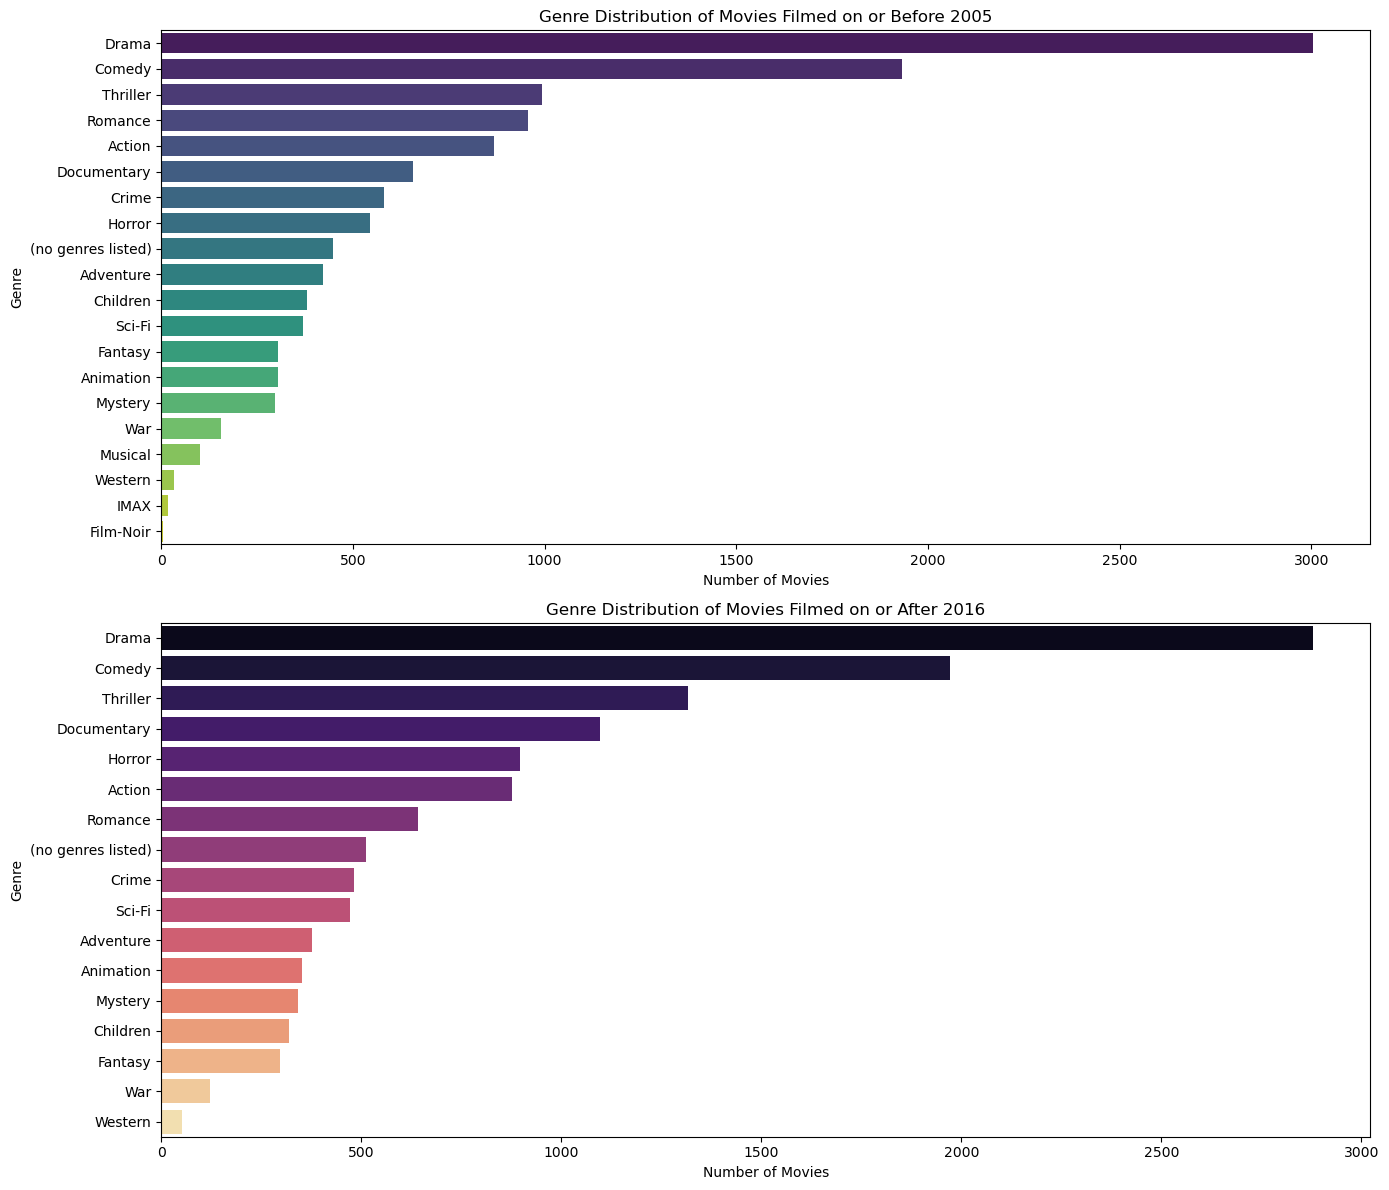

In [15]:
def plot_genre_distribution(movies):
    """
    This function creates horizontal bar plots for the distribution of movie genres
    for two subsets of movies: those filmed on or before 2005 and those filmed on or after 2016.
    
    Args:
        movies_df (pd.DataFrame): DataFrame containing movie data.
    """
    movies_before_2005 = movies[movies['year'] <= 2005]
    movies_after_2016 = movies[movies['year'] >= 2016]

    genres_before_2005 = get_genre_count(movies_before_2005)
    genres_after_2016 = get_genre_count(movies_after_2016)

    plt.figure(figsize=(14, 12))

    plt.subplot(2, 1, 1)  
    ax = sns.barplot(data=genres_before_2005, x='Count', y='Genre', hue='Genre', orient='h', palette='viridis', legend=False)
    ax.set_title('Genre Distribution of Movies Filmed on or Before 2005')
    ax.set_xlabel('Number of Movies')
    ax.set_ylabel('Genre')

    plt.subplot(2, 1, 2)  
    ax = sns.barplot(data=genres_after_2016, x='Count', y='Genre', hue='Genre', orient='h', palette='magma', legend=False)
    ax.set_title('Genre Distribution of Movies Filmed on or After 2016')
    ax.set_xlabel('Number of Movies')
    ax.set_ylabel('Genre')

    plt.tight_layout()
    plt.show()
    
plot_genre_distribution(movies)

<font size="+1" color="red">Replace this cell with a brief commentary comparing both distributions, including which genres changed popularity.</font>

##### From 2005 to 2016, Drama remains the top genre, followed by comedy and thriller, while Documentary gains popularity, reflecting increased interest in non-fiction. Adventure and Animation also rise, likely due to advancements in CGI. Meanwhile, genres like Musical and Western continue to decline in popularity, and there is also an important decline in romance popularity.

# 3. Content-based recommendation

## 3.1. Compute TF-IDF vectors

<font size="+1" color="red">Replace this cell with your code to add column "genres_arr" to the dataframe "movies".</font>

In [16]:
movies["genres"] = movies["genres"].fillna('')
movies["genres_arr"] = movies["genres"].str.split('|')
display(movies.head(5))

,movie_id,title,genres,year,genres_arr
0,2769,"Yards, The (2000)",Crime|Drama,2000,"[Crime, Drama]"
1,3177,Next Friday (2000),Comedy,2000,[Comedy]
2,3190,Supernova (2000),Adventure|Sci-Fi|Thriller,2000,"[Adventure, Sci-Fi, Thriller]"
3,3225,Down to You (2000),Comedy|Romance,2000,"[Comedy, Romance]"
4,3228,Wirey Spindell (2000),Comedy,2000,[Comedy]


In [17]:
# Leave this code as-is

print("Transformed: %s → %s" % (movies['genres'][3], movies['genres_arr'][3]))

Transformed: Comedy|Romance → ['Comedy', 'Romance']


In [18]:
# LEAVE AS-IS

# The reset-index is important to match row/column numbers in the tdifd-matrix

movies_filtered = movies[movies.year >= 2016]
movies_filtered = movies_filtered.reset_index()
display(movies_filtered.head(5))

,index,movie_id,title,genres,year,genres_arr
0,10897,122888,Ben-hur (2016),(no genres listed),2016,[(no genres listed)]
1,10898,122890,Warcraft (2016),Action|Adventure|Fantasy,2016,"[Action, Adventure, Fantasy]"
2,10900,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017,[(no genres listed)]
3,10901,122898,Justice League (2017),Action|Adventure|Sci-Fi,2017,"[Action, Adventure, Sci-Fi]"
4,10904,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,2016,"[Action, Adventure, Comedy, Sci-Fi]"


<font size="+1" color="red">Replace this cell with your code to generate "tfidf_matrix"</font>

In [19]:
movies_filtered['genres_str'] = movies_filtered['genres_arr'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")  #use stop words so to avoid counting words such as "the", "is", etc.

tfidf_matrix = vectorizer.fit_transform(movies_filtered['genres_str'])

print(tfidf_matrix.shape)  # Should output (7890, 128)

(7890, 128)


## 3.2. Calculate most similar movies

In [20]:
# Leave this code as-is

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.         1.         ... 1.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [1.         0.         1.         ... 1.         0.         0.        ]
 ...
 [1.         0.         1.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.41022264]
 [0.         0.         0.         ... 0.         0.41022264 1.        ]]


In [21]:
# Leave this code as-is

# Create an index to convert from numbers to movie_id
movie_id_to_index = pd.Series(movies_filtered.index, index=movies_filtered['movie_id'])

# Print the similarity vector
def print_similarity_vector(movie_id, similarities):
    
    # Determine the index of the movie_id
    index_source = movie_id_to_index[movie_id]
    
    # Get the row in the similarities matrix
    sim_scores = list(similarities[index_source])

    # Iterate through that row
    for index_target in range(len(sim_scores)):
        print("%.3f %d %s" %
              (sim_scores[index_target], movies_filtered.iloc[index_target].movie_id, movies_filtered.iloc[index_target].title))
        
print_similarity_vector(122904, cosine_sim)

0.000 122888 Ben-hur (2016)
0.362 122890 Warcraft (2016)
0.000 122896 Pirates of the Caribbean: Dead Men Tell No Tales (2017)
0.600 122898 Justice League (2017)
1.000 122904 Deadpool (2016)
0.600 122906 Black Panther (2017)
0.600 122908 Inhumans (2018)
0.600 122910 Captain Marvel (2018)
0.600 122912 Avengers: Infinity War - Part I (2018)
0.600 122914 Avengers: Infinity War - Part II (2019)
0.600 122916 Thor: Ragnarok (2017)
0.600 122918 Guardians of the Galaxy 2 (2017)
0.359 122920 Captain America: Civil War (2016)
0.600 122922 Doctor Strange (2016)
0.504 122924 X-Men: Apocalypse (2016)
0.362 122926 Untitled Spider-Man Reboot (2017)
0.440 135141 Allegiant: Part 1 (2016)
0.000 135143 Fantastic Beasts and Where to Find Them (2016)
0.000 135426 Fantastic Beasts and Where to Find Them 2 (2018)
0.056 135436 The Secret Life of Pets (2016)
0.326 135530 Criminal (2016)
0.309 135536 Suicide Squad (2016)
0.600 135567 Independence Day: Resurgence (2016)
0.600 135569 Star Trek Beyond (2016)
0.000 

<font size="+1" color="red">Replace this cell with your code for "genre_content_based_recommendations"</font>

In [22]:
def genre_content_based_recommendations(movie_id, movies, similarities, num_movies=10):
    index_source = movie_id_to_index[movie_id]
    
    # Get the similarity scores for the movie, paired with index numbers
    sim_scores = list(enumerate(similarities[index_source]))
    
    # Sort by similarity, descending order, and select the top `num_movies`
    top_similarities = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_movies+1]
    
    recommendations = []
    for (index_target, similarity) in top_similarities:
        # Retrieve movie_id, title, and genres from the movies DataFrame
        movie_id = movies.iloc[index_target].movie_id
        title = movies.iloc[index_target].title
        genres = movies.iloc[index_target].genres
        
        recommendations.append({
            'movie_id': movie_id,
            'title': title,
            'genres': genres,
            'similarity': similarity
        })
    return pd.DataFrame.from_records(recommendations, columns=['similarity', 'movie_id', 'title', 'genres'])

<font size="+1" color="red">Replace this cell with code to print the top 10 recommendations for movie "Pirates of the Caribbean" (movie_id=122896) and "Midsommer" (movie_id=201646).</font>

In [23]:
# Print top 10 recommendations for "Pirates of the Caribbean"
print("Top 10 recommendations for 'Pirates of the Caribbean':")
recommendations_pirates = genre_content_based_recommendations(122896, movies_filtered, cosine_sim, num_movies=10)
print(recommendations_pirates)

# Print top 10 recommendations for "Midsommer"
print("\nTop 10 recommendations for 'Midsommer':")
recommendations_midsommer = genre_content_based_recommendations(201646, movies_filtered, cosine_sim, num_movies=10)
print(recommendations_midsommer)

Top 10 recommendations for 'Pirates of the Caribbean':
   similarity  movie_id                                              title  \
0         1.0    122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
1         1.0    135426   Fantastic Beasts and Where to Find Them 2 (2018)   
2         1.0    138212                                    Spectral (2016)   
3         1.0    141131                                   Guardians (2016)   
4         1.0    143387                             Pitch Perfect 3 (2017)   
5         1.0    150724                                    Army Dog (2016)   
6         1.0    151461                                      Fitoor (2016)   
7         1.0    151593                                     Martyrs (2016)   
8         1.0    152037                                 Grease Live (2016)   
9         1.0    152230  First, the Last, The (Les premiers les dernier...   

               genres  
0  (no genres listed)  
1  (no genres listed)  
2  (no genres 

<font size="+1" color="red">Replace this cell with code to get the list of recommendation for three movies you are familiar with. Indicate the **precision** of each list, which is the percentage of recommended movies that *you* consider relevant (mark manually as "relevant" or "irrelevant" each recommendation). Indicate the **average precision** across the three lists.</font> 

In [24]:
#See recommendations for selected movies
movie_ids = [164141, 165085, 200256]
recommendation_results = {}

for movie_id in movie_ids:
    recommendations = genre_content_based_recommendations(movie_id, movies_filtered, cosine_sim, num_movies=10)
    recommendation_results[movie_id] = recommendations  # Store recommendations for later use
    
    print(f"Recommendations for movie ID {movie_id}:")
    print(recommendations[['similarity', 'movie_id', 'title', 'genres']])
    print("\n---\n")

Recommendations for movie ID 164141:
   similarity  movie_id                                  title genres
0         1.0    142222                      Demolition (2016)  Drama
1         1.0    151501                         Exposed (2016)  Drama
2         1.0    151631                   JÃ¤ttilÃ¤inen (2016)  Drama
3         1.0    151715               The White Knights (2016)  Drama
4         1.0    151743  Toni Braxton: Unbreak My Heart (2016)  Drama
5         1.0    151933           The Birth of a Nation (2016)  Drama
6         1.0    152057                     Miles Ahead (2016)  Drama
7         1.0    152067                          Neerja (2016)  Drama
8         1.0    152071                            Race (2016)  Drama
9         1.0    152085                        Desierto (2016)  Drama

---

Recommendations for movie ID 165085:
   similarity  movie_id                                         title  \
0    1.000000    165085  Batman: Return of the Caped Crusaders (2016)   
1   

In [26]:
recommendation_results[164141]['relevance'] = [
    "irrelevant", "irrelevant", "irrelevant", "irrelevant", "irrelevant",
    "irrelevant", "irrelevant", "irrelevant", "irrelevant", "irrelevant"
] #Despite I.T. being a thriller, the recommendations are all dramas without any thriller or tech-related aspect, making them generally irrelevant.

recommendation_results[165085]['relevance'] = [
    "relevant", "relevant", "relevant", "relevant", "relevant",
    "relevant", "relevant", "relevant", "relevant", "relevant"
] #All recommended films have superhero themes or are animated action-comedies, aligning well with Batman: Return of the Caped Crusaders. These are relevant.

recommendation_results[200256]['relevance'] = [
    "relevant", "relevant", "relevant", "relevant", "relevant",
    "relevant", "relevant", "relevant", "relevant", "relevant"
] #All recommended films share the themes of family-friendly adventure or fantasy, matching well with Dumbo. These are relevant.

# Calculate precision for each recommendation list and average precision across the three lists.
precisions = []
for movie_id, recommendations in recommendation_results.items():
    num_relevant = recommendations[recommendations['relevance'] == "relevant"].shape[0]
    precision = num_relevant / len(recommendations) * 100  # Percentage
    precisions.append(precision)
    
    print(f"Precision for movie ID {movie_id}: {precision:.2f}%")

# Calculate and print the average precision
average_precision = sum(precisions) / len(precisions)
print(f"\nAverage Precision across the three lists: {average_precision:.2f}%")

Precision for movie ID 164141: 0.00%
Precision for movie ID 165085: 100.00%
Precision for movie ID 200256: 100.00%

Average Precision across the three lists: 66.67%


<font size="+1" color="red">Replace this cell with ideas on how you would improve **this** content-based recommendations, based on what we discussed in class about content-based recommendations.</font>

##### To improve content-based movie recommendations, we can expand the feature set to include more metadata like directors, actors, plot descriptions, and user reviews, which provide a richer context than genres alone. Weighted combinations of these features, adjusted for user preferences, could enhance relevance. Adding diversity to recommendations, incorporating visual and audio analysis, and emphasizing recent or trending movies could make suggestions more engaging. Finally, a feedback loop allowing users to rate recommendations would enable continuous refinement, ensuring the system adapts to evolving tastes.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>